Learning classification using wine and breast caner data set from skleanr

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine,load_breast_cancer,load_iris
import itertools


In [54]:
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data,columns=wine.feature_names)
wine_df['target'] = wine.target

Data split on traing and test data set

In [55]:
from sklearn.model_selection import train_test_split
X = np.asanyarray(wine_df.iloc[:,0:12])
y = np.asanyarray(wine_df['target'])
x_train,x_test,y_train,y_test = train_test_split(X,y)

Comparison of two classification model

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

acc_knn = np.zeros(10)
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    acc_knn[i] = accuracy_score(y_test,y_pred)

np.argmax(acc_knn)


1

In [68]:
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]: #print(line)
        t = line.split() 
        # print(t)
        if(len(t)==0): 
            break
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

In [69]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [73]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB().fit(x_train,y_train)
y_pred = NB.predict(x_test)
acc_NB = accuracy_score(y_test,y_pred)
print(f'Accuracy NB: {acc_NB}')
NB_report = classification_report(y_test,y_pred,target_names=wine.target_names)

Accuracy NB: 0.9555555555555556


Confusion matrix, without normalization
[[15  1  0]
 [ 1 16  0]
 [ 0  0 12]]


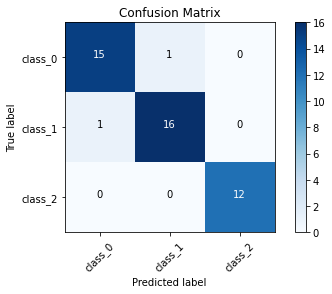

In [71]:
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=wine.target_names,normalize=False, title = 'Confusion Matrix')

['class_0' 'class_1' 'class_2']
